## Header 
Author : Amina Matt and Yichen Wang  
Date created : 20.10.2021  
Date last modified : 22.11.2021  
Python version : 3.8  
Description : Word frequency and wordcloudof the CARICOM Compilation Archive (CCA) https://louverture.ch/cca/ 



In [45]:
# -*- coding: utf-8 -*-

import nltk #Natural Language Toolkit is a natural language programming library
import matplotlib.pyplot as plt
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [46]:
def preprocessing(data):
    # convert all words to lowercase
    data = [item.lower() for item in data]
    # load the stop_words of english
    stop_words = set(stopwords.words('english'))
    # update stop_words 
    stop_words.update(['also','de', 'canton', 'swiss', 'became', 'one', 'switzerland'])
    # concatenate all the data with spaces.
    paragraph = ' '.join(data)
    # tokenize the paragraph using the inbuilt tokenizer
    word_tokens = word_tokenize(paragraph) 
    # filter words present in stopwords list 
    preprocessed_data = [word for word in word_tokens if not word in stop_words and word.isalpha()]
    
    return preprocessed_data

def create_word_cloud(final_data):
    # initiate WordCloud object with parameters width, height, maximum font size and background color
    wordcloud = WordCloud(width=1920, height=1080, max_font_size=200, background_color="white").generate_from_frequencies(final_data)
    # plt the image generated by WordCloud class
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [47]:
def divide_items(textFilePath):
    f = open(textFilePath,"r")
    item = []
    for line in f: 
        if (line != '\n'):
            # extract paragraph starting with both => and •
            if (line[0] == '=') and (line[1] == '>') or (line[0] == '•'):
                item_text = ''
                while (line != '\n'):
                    item_text = item_text + line
                    line = f.readline()
                item_text = item_text.replace('\n','')  
                
                if line[0] == '•':
                    item_text = item_text.replace('•','') 
                else:
                    item_text = item_text.replace('=> ','') 
                item.append(item_text)
        
    f.close()
    return item

In [48]:
DATA_FOLDER = './data/'
caricom = DATA_FOLDER +'Caricom_Archive.txt'

text_items = divide_items(caricom)
print(len(text_items))
text_items[10]

608


'After 1800, Anton Schulthess from a Zurich merchant and banking family served as captain in the British Royal-African-Corps in Barbados. In 1814, his elder brother, Colonel Paravicin Schulthess (1757-1843), applied to the British ambassador for a death certificate for his brother, who had apparently deceased some years earlier.'

In [49]:
clean_data = preprocessing(text_items)

In [60]:
wordfreqdist = nltk.FreqDist(clean_data)
words_dict = dict(sorted(wordfreqdist.items(), key=lambda x: x[1], reverse=True))
words_dict

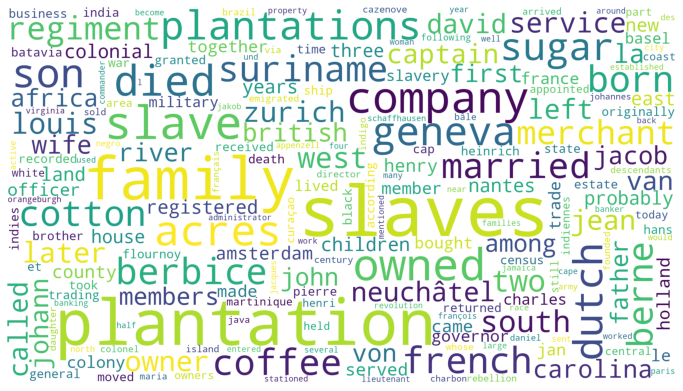

In [51]:
create_word_cloud(words_dict)